# Coursera Capstone Project

## The Battle of Neighborhoods - Final Report (Week 1 and 2)

## Guy Ravet


In [5]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [71]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [72]:

body = client_93c8f3b6e0d845dfa025384daf149bb5.get_object(Bucket='courseracapstone-donotdelete-pr-aloi0rzs0juxny',Key='mh_flats_price.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


# Coursera Capstone

#### - Introduction Section :   
Discussion of the business problem and interested audience.
#### - Data Section:   
Description of the data that will be used to solve the problem and the sources.
#### - Methodology section  
Discussion and description of exploratory data analysis carried out.
#### - Results section   
Discussion of the results.
#### - Discussion section   
Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
#### - Conclusion section   
Report Conclusion.

# 1.	Introduction Section : 
### Discussion of the business problem and the audience who would be interested in this project.

### Description of the Problem and Background

### Scenario:

I'm a data scientist in Switzerland. I recently got promoted but will need to move to New York City. I don't really know the city so I need a way to find out which neighborhood would be best for me. I have a comfortable life in Switzerland and would like to find the same, or better, in this gorgeous city.

Here are my requests : 
 - 2 or 3 bedrooms apartment
 - Near a metro station in the Manhattan area and within 1.0 mile (1.6 km) radius
 - Rent below $7,000 per month
 - Ammenities in the selected neighborhood shall be similar to my current situation
 - Would like to have venues such as coffee shops, asian food restaurants, wine stores, gym club and food shops    
    

### Business Problem:   
The challenge is to find a suitable apartment for rent in Manhattan that complies with the demands on location, price and venues. The data required to resolve this challenge is described in the following section 2.

### Interested Audience
I believe this is a relevant challenge with valid questions for anyone moving to any other large city. The same methodology can be applied in accordance to demands as applicable. It definetely a good exercise to develop Data Science skills.

# 2. Data Section:
### Description of the data and its sources that will be used to solve the problem

### Data Required to resolve the problem
In order to make a good choice of AN apartment in Manhattan NY, the following data is required:
List/Information on neighborhoods form Manhattan with their Geodata ( latitude and longitude)
List/Information about the subway metro stations in Manhattan with geodata.
Listed apartments for rent in Manhattan area with descriptions ( how many beds, price, location, address)
Venues and ammenities in the Manhattan neighborhoods

The list of Manhattan neighborhoods has been done in this course before. A csv file was created which will be read in order to create a dataframe and its mapping. The csv file 'mh_neigh_data.csv'  has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings. The clustering of neighborhoods and mapping will be shown however. An algorythm was used to determine the geodata from Nominatim . The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run. 

mh_neigh_data.tail():

              Borough    Neighborhood    Latitude    Longitude

          35    Manhattan    Turtle Bay    40.752042    -73.967708

          36    Manhattan    Tudor City    40.746917    -73.971219

          37    Manhattan    Stuyvesant Town    40.731000    -73.974052

          38    Manhattan    Flatiron    40.739673    -73.990947

          39    Manhattan    Hudson Yards    40.756658    -74.000111
  
A list of Manhattan subway metro stops was complied in Numbers and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan) and information from NY Transit authority and Google maps (https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1) for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorythm using Nominatim. Details will be shown in the execution of methodolody in section 3.0. The subway csv file is ''MH_subway.csv'" and the data structure is: mhsub.tail():
               sub_station                    sub_address                         lat        long

      17    190 Street Subway Station    Bennett Ave, New York, NY 10040, USA    40.858113    -73.932983

      18    59 St-Lexington Av Station    E 60th St, New York, NY 10065, USA        40.762259    -73.966271

      19    57 Street Station    New York, NY 10019, United States                40.764250    -73.954525

      20    14 Street / 8 Av    New York, NY 10014, United States                40.730862    -73.987156

      21    MTA New York City    525 11th Ave, New York, NY 10018, USA            40.759809    -73.999282
A list of places for rent was collected by web-browsing real estate companies in Manhattan : http://www.rentmanhattan.com/index.cfm?page=search&state=results https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=list https://www.realtor.com/apartments/Manhattan_NY
A csv file was compiled with the rental place that indicated: areas of Manhattan, address, number of beds, area and monthly rental price. The csv file "nnnn.csv" had the following below structure. An algorythm was used to create all the geodata using Nominatim, as shown in section 3.0. The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run. With the use of geolocator = Nominatim() , it was possible to determine the latitude and longiude for the subway metro locations as well as for the geodata for each rental place listed. The loop algorythms used are shown in the execution of data in section 3.0
"Great_circle" function from geolocator was used to calculate distances between two points , as in the case to calculate average rent price for units around each subway station and at 1.6 km radius.
Foursquare is used to find the avenues at Manhattan neighborhoods in general and a cluster is created to later be able to search for the venues depending of the location shown.

###  How the data will be used to solve the problem
The data will be used as follows:
Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups  
Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately  
Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations.  
Create a map that indicates, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area.  
Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.  
Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.  

###  Mapping of Data
The following maps were created to facilitate the analysis and the choice of the palace to live.
Manhattan map of Neighborhoods
manhattan subway metro locations
Manhattan map of places for rent
Manhattan map of clustered venues and neighborhoods
Combined maps of Manhattan rent places with subway locations
Combined maps of Manhattan rent places with subway locations and venues clusters


## 3. Methodology section:

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps. 

### The analysis and the stragegy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of  location, price and feature, thus  making the selection very easy. 

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:
- what is the cost of available rental places that meet the demands?
- what is the cost of rent around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

#      METHODOLOY EXECUTION  - Mapping Data

# MANHATTAN NEIGHBORHOODS - DATA AND MAPPING 
## Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.

In [73]:
# Read csv file with clustered neighborhoods with geodata
manhattan_data  = df_data_1
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [27]:
manhattan_data.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


# Manhattan Borough neighborhoods - data with top 10 clustered venues


In [74]:

body = client_93c8f3b6e0d845dfa025384daf149bb5.get_object(Bucket='courseracapstone-donotdelete-pr-aloi0rzs0juxny',Key='mh_new.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_7 = pd.read_csv(body)
df_data_7.head()


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Caf?akery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant,NaN
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Caf?ine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,NaN
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Caf?eli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio,NaN


In [75]:
manhattan_merged = df_data_7
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Caf?akery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant,NaN
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Caf?ine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,NaN
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Caf?eli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio,NaN


# Map of Manhattan neighborhoods with top 10 clustered venues

## popus   allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell

In [60]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

## Examine a paticular Cluster - print venues

### After examining several cluster data , I concluded that cluster # 2 is the most suitable place, therefore providing guidance as to where to look for the future apartment .
### Assign a value to 'kk' to explore a given cluster.

In [61]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Caf?eli / Bodega,Tennis Court,NaN
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Caf?ym / Fitness Center,Thai Restaurant,Restaurant,Gym,NaN


# Map of Manhattan places for rent

## Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces. 
### The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.

In [76]:
# csv files with rental places with basic data but still wihtout geodata ( latitude and longitude)
# pd.read_csv(' le.csv', header=None, nrows=5)
mh_rent= df_data_2
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [77]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


## Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim

### Data  was stored in a csv file for simplifaction report purposes and saving code processing time in future.

In [78]:

body = client_93c8f3b6e0d845dfa025384daf149bb5.get_object(Bucket='courseracapstone-donotdelete-pr-aloi0rzs0juxny',Key='mh_rent_latlong.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [79]:
mh_rent= df_data_3
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [80]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,40.758216,-73.965190
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,40.772474,-73.981901
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,40.733691,-73.997323


# Manhattan apartment rent price statistics
### A US 7000 Dollar per month rent is actually around the mean value

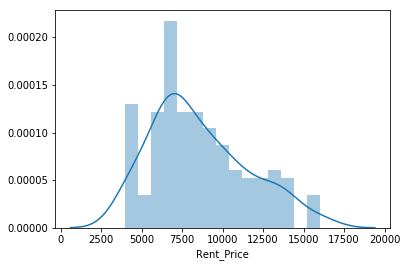

In [81]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

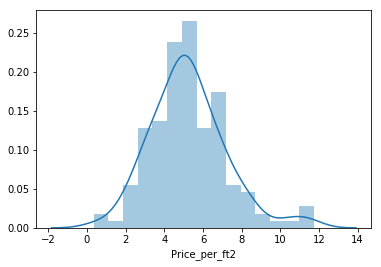

In [82]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

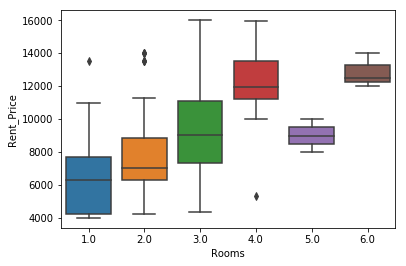

In [83]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

# Map of Manhattan apartments for rent 
### The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated

In [65]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

# Map of Manhattan showing the places for rent and the cluster of venues 
### Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.
### This is an insightful way to explore rental possibilites

In [84]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2


# Now one can explore a particular rental place and its venues in detail

## In the map above, examination of appartments with rental place below 7000/month is straightforward while knowing the venues around it. 
## We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [67]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Caf?ine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,NaN
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Caf?ndian Restaurant,Bakery,Seafood Restaurant,Electronics Store,NaN
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


# Mapping Manhattan Subway locations
### Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit.  For simplification, a csv file was produced from Numbers so that the reading of this file is the starting point here.

### The geodata will be obtain via Nominatim using the algorythm below.

In [68]:

body = client_93c8f3b6e0d845dfa025384daf149bb5.get_object(Bucket='courseracapstone-donotdelete-pr-aloi0rzs0juxny',Key='nyc_subway_list.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


In [53]:
# A csv file summarized the subway station and the addresses for next step to determine geodata
mh= df_data_4
mh.head()

,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


### Add colums labeled 'lat' and 'long' to be filled with geodata

In [85]:
#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [86]:

body = client_93c8f3b6e0d845dfa025384daf149bb5.get_object(Bucket='courseracapstone-donotdelete-pr-aloi0rzs0juxny',Key='mh_subway.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [87]:
mh= df_data_5
print(mh.shape)
mh.head()

(76, 4)


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [88]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(22, 4)

In [89]:
mhsub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


## MAP of Manhattan showing the location of subway stations

In [90]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

# Map of Manhattan showing places for rent and the subway locations nearby

## Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
### Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station


In [ ]:
mh_rent.head()

In [ ]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

# 4.0 Results

## CONSOLIDATE MAP
### Let's consolidate all the required information to make the apartment selection in one map


# Map of Manhattan with rental places, subway locations and cluster of venues
###  Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [ ]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

# Problem Resolution

## The above consolidate map was used to explore options.  
### After examining, I have chosen two locations that meet the requirements which will assess to make a choice.

- Apartment 1: 
    305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2
    Monthly rent : 7500 Dollars
    
- Apartment 2: 
    19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3
    Monthly rent : 6935 Dollars
 

## Venues for Apartment 1 - Cluster 2

In [ ]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

In [ ]:
## Venues for Apartment 2 - Cluster 3

In [ ]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

# Apartment Selection

###  Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

### Apartment 1 rent cost is US7500 slightly above the budget. Apt 1 is located 400 meters from subway station at 59th Street and work place ( Park Ave and 53rd) is another 600 meters way. I can walk to work place and use subway for other places aroung. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.

### Apartment 2 rent cost is US6935, just under budget. Apt 2 is located 60 meters from subway station at Fulton Street, but I will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster 3.¶

###  I feel that Cluster 2 type of venues is a better option. That means that APARTMENT 1 is a better choice since the extra monthly rent is worth the conveniences it provides.

# 5.0 DISCUSSION

###  This project gave me a good opportunity to apply and exercice all of the skills I learned in the past two months while taking this course.

# 6.0 CONCLUSIONS

### I'm actually impressed of all the things you can do when you know how to manipulate data. What is amazing is the amount of data available open source. It's a very powerful ressource that will most likely become more and more valuable in the future.